# **Análisis de canciones: Predicción del género musical**

# Proyecto de Machine Learning

## PARTE III: Ensemble

### by Marta Buesa

#### Febrero 2022 

![MartaBuesaProyectoML](portada_ML.png)

# 1. Importo librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. Importo datasets
## TRAIN

### X_train NO estandarizado

In [2]:
X_train = pd.read_csv('csvs/X_train_modified_noAcousticEnergy.csv')
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_train.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,26.0,0.481,345253.0,-1.493326,-0.329894,-8.404,1.000000,0.0388,98.37,0.372,...,1,0,0,0,0,0,0,0,0,0
1,21.0,0.242,480013.0,-0.167240,-2.180367,-21.232,0.179818,0.0349,80.19,0.117,...,0,0,0,0,0,0,1,0,0,0
2,47.0,0.798,219960.0,-3.868285,-1.703749,-11.412,0.179818,0.0363,81.02,0.677,...,0,0,0,0,0,0,0,0,1,0
3,39.0,0.573,219019.0,-1.493326,-1.883875,-6.047,1.000000,0.0374,141.92,0.606,...,0,0,0,0,0,0,0,0,1,0
4,58.0,0.427,265640.0,-0.207082,-1.777857,-3.488,0.179818,0.0472,133.93,0.539,...,0,0,1,0,0,0,0,0,0,0
5,29.0,0.410,225093.0,-2.062738,-1.164752,-2.381,1.000000,0.1410,148.11,0.152,...,0,0,0,0,0,0,0,1,0,0
6,30.0,0.624,251000.0,-4.371529,-2.154165,-7.900,0.179818,0.0313,125.10,0.272,...,0,0,0,0,0,0,0,0,0,0
7,28.0,0.481,202707.0,-1.493326,-1.111698,-4.094,0.179818,0.0509,119.91,0.700,...,0,0,0,0,0,0,0,0,0,0
8,57.0,0.921,234787.0,-1.493326,-2.566551,-9.200,1.000000,0.0823,120.04,0.317,...,0,0,0,0,0,0,0,0,0,0
9,52.0,0.497,230513.0,-5.387271,-1.754464,-4.383,1.000000,0.0445,96.50,0.231,...,0,0,0,0,0,0,0,0,1,0


### X_train estandarizado

In [3]:
X_train_scal = pd.read_csv('csvs/X_train_modified_and_scaled_noAcousticEnergy.csv')
X_train_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_train_scal.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,-1.181905,-0.443239,1.288685,0.525620,2.361115,0.109311,1.342698,-0.541965,-0.746923,-0.348067,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
1,-1.504704,-1.789203,2.919348,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,-1.373654,-1.383412,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344
2,0.173848,1.341994,-0.227422,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,-1.345041,0.890287,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
3,-0.342630,0.074873,-0.238809,0.525620,0.006656,0.497551,1.342698,-0.555777,0.754407,0.602014,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
4,0.884005,-0.747348,0.325328,1.249039,0.167285,0.919065,-0.744769,-0.459096,0.478962,0.329982,...,-0.307488,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
5,-0.988226,-0.843086,-0.165311,0.205367,1.096209,1.101408,1.342698,0.466274,0.967799,-1.241306,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
6,-0.923667,0.362087,0.148177,-1.093161,-0.402865,0.192329,-0.744769,-0.615956,0.174559,-0.754085,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-1.052786,-0.443239,-0.436192,0.525620,1.176593,0.819246,-0.744769,-0.422594,-0.004359,0.983671,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,0.819445,2.034687,-0.048008,0.525620,-1.027677,-0.021805,1.342698,-0.112822,0.000122,-0.571377,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
9,0.496646,-0.353132,-0.099726,-1.664443,0.202728,0.771642,1.342698,-0.485733,-0.811388,-0.920552,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_train con label encoder

In [4]:
y_train = pd.read_csv('csvs/y_train_transformed_noAcousticEnergy.csv')
#y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_train.head(10)

,music_genre
0,2
1,3
2,2
3,4
4,0
5,2
6,5
7,1
8,0
9,0


In [5]:
print(X_train.shape)
print(X_train_scal.shape)
print(y_train.shape)

(39719, 21)
(39719, 21)
(39719, 1)


## TEST

### X_test NO standarizado

In [6]:
X_test = pd.read_csv('csvs/X_test_modified_noAcousticEnergy.csv')
X_test.drop(columns=['Unnamed: 0'], inplace=True)
X_test.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,60.0,0.487,219019.0,-3.636274,-0.376878,-11.211,1,0.0434,105.85,0.2400,...,0,0,0,0,0,1,0,0,0,0
1,33.0,0.483,158067.0,-2.310026,-2.162823,-5.767,1,0.0738,159.78,0.7370,...,0,0,0,0,0,0,0,0,0,0
2,36.0,0.396,314800.0,-0.176439,-2.198225,-12.908,1,0.0429,150.01,0.6180,...,0,0,0,0,1,0,0,0,0,0
3,63.0,0.518,196493.0,-1.489131,-1.609438,-10.766,0,0.0297,104.53,0.5790,...,0,0,0,0,0,0,0,0,0,0
4,72.0,0.715,130929.0,-5.206685,-1.682009,-5.558,1,0.2400,176.12,0.2830,...,0,0,0,0,0,0,0,1,0,0
5,59.0,0.595,220133.0,-5.026046,-2.111965,-6.764,1,0.0540,120.08,0.0994,...,1,0,0,0,0,0,0,0,0,0
6,36.0,0.447,380933.0,-2.076720,-2.570465,-6.657,1,0.0860,153.76,0.6760,...,1,0,0,0,0,0,0,0,0,0
7,33.0,0.794,301977.0,-2.958689,-1.555897,-5.294,1,0.0779,91.04,0.7460,...,0,0,0,0,1,0,0,0,0,0
8,40.0,0.536,218040.0,-3.606730,-0.673345,-6.266,0,0.0279,144.04,0.4450,...,0,0,0,0,0,0,0,0,1,0
9,54.0,0.512,304427.0,-4.202528,-1.130103,-6.857,0,0.0343,114.96,0.2360,...,0,0,0,0,0,0,0,0,1,0


### X_test estandarizado

In [7]:
X_test_scal = pd.read_csv('csvs/X_test_modified_and_scaled_noAcousticEnergy.csv')
X_test_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_test_scal.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,1.013124,-0.409449,-0.238809,-0.679633,2.289930,-0.353053,1.342698,-0.496585,-0.489059,-0.884010,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344
1,-0.729988,-0.431976,-0.976358,0.066285,-0.415983,0.543672,1.342698,-0.196678,1.370107,1.133897,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
2,-0.536309,-0.921929,0.920189,1.266274,-0.469621,-0.632580,1.342698,-0.501517,1.033299,0.650736,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
3,1.206803,-0.234868,-0.511385,0.527979,0.422459,-0.279753,-1.202430,-0.631740,-0.534565,0.492389,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
4,1.787840,0.874567,-1.304742,-1.562876,0.312506,0.578098,1.342698,1.442945,1.933407,-0.709423,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
5,0.948564,0.198769,-0.225329,-1.461280,-0.338927,0.379448,1.342698,-0.392012,0.001501,-1.454871,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
6,-0.536309,-0.634715,1.720431,0.197503,-1.033607,0.397073,1.342698,-0.076320,1.162575,0.886227,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-0.729988,1.319468,0.765024,-0.298540,0.503579,0.621584,1.342698,-0.156230,-0.999615,1.170439,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,-0.278070,-0.133498,-0.250655,-0.663017,1.840748,0.461478,-1.202430,-0.649498,0.827491,-0.051674,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
9,0.625766,-0.268658,0.794670,-0.998110,1.148707,0.364130,-1.202430,-0.586359,-0.175004,-0.900251,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_test con label encoder

In [8]:
y_test = pd.read_csv('csvs/y_test_transformed_noAcousticEnergy.csv')
y_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test.head(10)

,music_genre
0,7
1,2
2,7
3,9
4,6
5,8
6,7
7,5
8,4
9,9


In [9]:
print(X_test.shape)
print(X_test_scal.shape)
print(y_test.shape)

(9943, 21)
(9943, 21)
(9943, 1)


### Generos_musicales 

* 'Alternative': 0
* 'Anime': 1 
* 'Blues': 2 
* 'Classical': 3
* 'Country': 4
* 'Electronic': 5 
* 'Hip-Hop': 6
* 'Jazz': 7
* 'Rap': 8
* 'Rock': 9

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
def mostrar_resultados(muestra, truee, pred):
    '''
    Función que muestra los resultados del modelo: matriz de confusión y reporte de aciertos en laclasificación entre los generos musicales
    '''
    c_matrix = confusion_matrix(truee, pred)
    plt.figure(figsize=(15,10))
    if muestra == 'TRAIN':
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Blues');
    else:
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Greens');
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(truee, pred))

## 3.4. ENSEMBLE: RandomForest LogisticRegression & SVC

### Importo librerias necesarias

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

### Preparo el modelo y lo entreno

In [13]:
log_clf = LogisticRegression()

rnd_clf = RandomForestClassifier(n_estimators=100)

# EN SOFT VOTING: alg SVM pongo probability=True
svm_clf = SVC(gamma= 'scale', probability= True)

voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting = 'soft')

voting_clf.fit(X_train_scal, y_train)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

### Predicción sobre TRAIN

In [14]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_scal, y_train.values.ravel())
    y_train_prediction = clf.predict(X_train_scal)
    print(clf.__class__.__name__, accuracy_score(y_train, y_train_prediction))

LogisticRegression 0.5065585739822251
RandomForestClassifier 0.973513935396158
SVC 0.5791434829678491
VotingClassifier 0.8294518995946525


Resultados Ensemble en TRAIN:


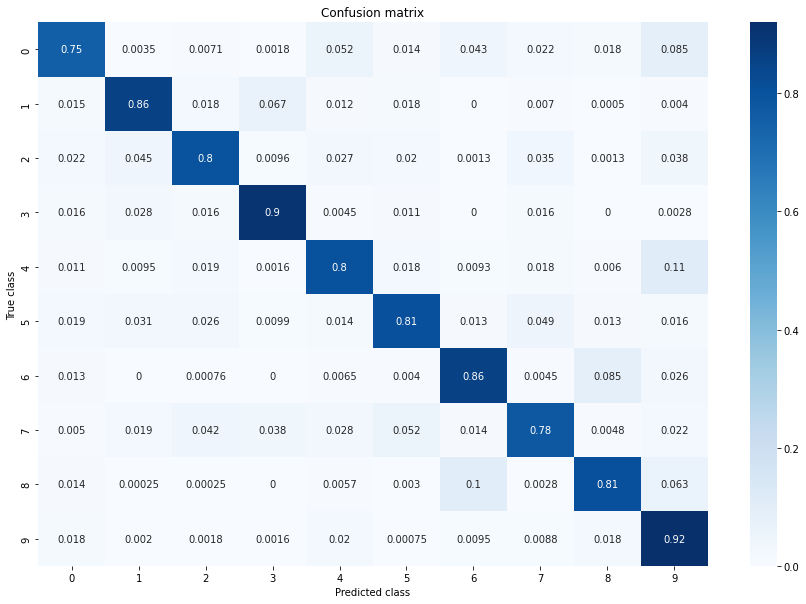

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      3995
           1       0.86      0.86      0.86      3989
           2       0.86      0.80      0.83      3951
           3       0.87      0.90      0.89      3852
           4       0.83      0.80      0.81      4011
           5       0.85      0.81      0.83      3975
           6       0.82      0.86      0.84      3984
           7       0.83      0.78      0.80      3999
           8       0.85      0.81      0.83      3976
           9       0.72      0.92      0.81      3987

    accuracy                           0.83     39719
   macro avg       0.83      0.83      0.83     39719
weighted avg       0.83      0.83      0.83     39719



In [15]:
print('Resultados Ensemble en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_train_prediction)

In [16]:
acierto = accuracy_score(y_train, y_train_prediction)
error = 1 - acierto

print('Score Ensemble en TRAIN:\n-----------------------------')
print("Accuracy train:", round(acierto*100, 2), "%")
print("Error train:", round(error*100, 2), "%")

Score Ensemble en TRAIN:
-----------------------------
Accuracy train: 82.95 %
Error train: 17.05 %


### Predicción sobre TEST

In [17]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_scal, y_train.values.ravel())
    y_test_prediction = clf.predict(X_test_scal)
    print(clf.__class__.__name__, accuracy_score(y_test, y_test_prediction))

LogisticRegression 0.4989439806899326
RandomForestClassifier 0.519360354017902
SVC 0.5360555164437293
VotingClassifier 0.5213718193704113


Resultados Ensemble en TEST:


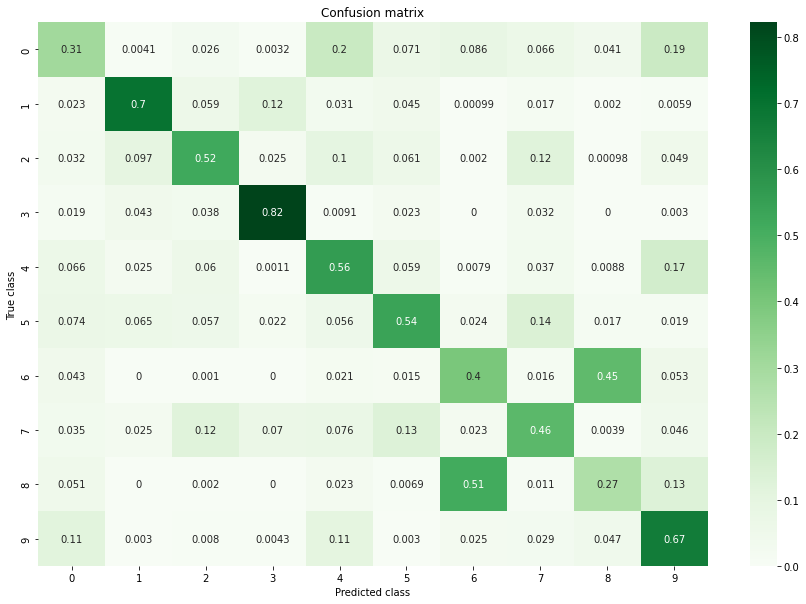

              precision    recall  f1-score   support

           0       0.40      0.31      0.35      1002
           1       0.73      0.70      0.71       987
           2       0.58      0.52      0.55      1000
           3       0.77      0.82      0.80       930
           4       0.47      0.56      0.51       986
           5       0.57      0.54      0.55      1008
           6       0.37      0.40      0.38      1015
           7       0.50      0.46      0.48       981
           8       0.32      0.27      0.29      1023
           9       0.50      0.67      0.57      1011

    accuracy                           0.52      9943
   macro avg       0.52      0.52      0.52      9943
weighted avg       0.52      0.52      0.52      9943



In [18]:
print('Resultados Ensemble en TEST:')
mostrar_resultados('TEST', y_test, y_test_prediction)

In [19]:
acierto = accuracy_score(y_test, y_test_prediction)
error = 1 - acierto

print('Score Ensemble en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Ensemble en TEST:
-----------------------------
Accuracy test: 52.14 %
Error test: 47.86 %


### Guardo CSV con resultados obtenidos en Logistic Regression en TEST

In [20]:
results_ensemble = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_test_prediction,output_dict=True)).transpose()

results_ensemble = results_ensemble.add_prefix('Ensemble(RL-RF-SVM_')

results_ensemble = results_ensemble.iloc[:,0:-1]

results_ensemble

,Ensemble(RL-RF-SVM_precision,Ensemble(RL-RF-SVM_recall,Ensemble(RL-RF-SVM_f1-score
0,0.402868,0.308383,0.349350
1,0.727081,0.699088,0.712810
2,0.581839,0.519000,0.548626
3,0.769618,0.822581,0.795218
4,0.473008,0.559838,0.512773
5,0.565172,0.537698,0.551093
6,0.369625,0.398030,0.383302
7,0.497802,0.461774,0.479112
8,0.321719,0.270772,0.294055
9,0.498150,0.665678,0.569856


In [21]:
results_ensemble.to_csv('models/ensemble_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Quiero comparar resultados obtenidos en cada modelo, asi que creo un data frame donde almacenaré los accuracys obtenidos en cada uno

In [22]:
scores_obtained_ensemble = {'Ensemble(%)': [accuracy_score(y_train, y_train_prediction)*100,
                    accuracy_score(y_test, y_test_prediction)*100]}

scores_obtained_ensemble = pd.DataFrame(scores_obtained_ensemble, index=['Accuracy_train', 'Accuracy_test'])

scores_obtained_ensemble

,Ensemble(%)
Accuracy_train,82.945190
Accuracy_test,52.137182


In [23]:
scores_obtained_ensemble.to_csv('models/ensemble_accuracy_on_test_colifree.csv', index= True)